# Análise de Empresas Penalizadas pelo Governo

Vamos realizar uma **análise exploratória** e uma **integração de dados** preliminar para analisar as empresas penalizadas pelo Governo. O objetivo é gerar insights para projetos e trilhas futuras no Governo Federal quanto à compras públicas.

**O que é uma empresa penalizada?** uma empresa contratada pelo Governo pode ser penalizada por vários motivos como irregularidade na prestação de serviços, descumprimento de cláusula contratual, problemas na apresentação de contas, entre outros. Como penalidade, uma empresa pode receber desde uma advertência, multa e até a suspensão e proibição de contratação pelo Governo. Falam muito sobre empresas "SICAFEADAS", aquelas cadastradas na lista negra do SICAF, que não podem mais ter contratos com o Governo porque estão com alguma penalidade ativa. Porém, descobrimos que não existe só o SICAF. Por isso, o primeiro desafio foi o de identificar quem são os órgãos penalizadores e onde estão estas bases de dados. Pra nomenclatura, entendemos como **penalidade** qualquer tipo de **ocorrência** ou **sanção** contra empresas contratadas pelo Governo.

### Origens de Dados
* Ministério da Economia.**SICAF:** http://compras.dados.gov.br/docs/fornecedores/v1/fornecedores.html
* CGU. Cadastro de Entidades sem Fins Lucrativos Impedidas - **CEPIM:** http://www.portaltransparencia.gov.br/download-de-dados/cepim
* CGU. Cadastro de Empresas Inidôneas e Suspensas - **CEIS:** http://www.portaltransparencia.gov.br/download-de-dados/ceis
* CGU. Cadastro Nacional de Empresas Punidas - **CNEP:** http://www.portaltransparencia.gov.br/download-de-dados/cnep
* TCU. Lista de responsáveis declarados inidôneos para participar de licitação na administração pública federal, nos termos do art. 46 da Lei Orgânica do TCU, cuja inidoneidade encontre-se vigente. **INIDONEOS**: https://portal.tcu.gov.br/responsabilizacao-publica/licitantes-inidoneos/
* Governo do RJ. Sancoes do Sistema de Compras Públicas do Estado do Rio de Janeiro RJ. **SANCOES RJ:** http://www.compras.rj.gov.br/Portal-Siga/Sancao/listar.action (listagem de todos de 01/01/2000 a 18/02/2019)
* Governo de MG. Sanções do Estado de Minas Gerais MG. (arquivo extraído ate 18/02/2019) **SANCOES MG:** https://www.cagef.mg.gov.br/fornecedor-web/br/gov/prodemge/seplag/fornecedor/publico/index.zul
* Receita Federal. Cadastro Nacional de Empresas Jurídicas - CNPJ (arquivo de 14 de março de 2019) **EMPRESAS:** http://receita.economia.gov.br/orientacao/tributaria/cadastros/cadastro-nacional-de-pessoas-juridicas-cnpj/dados-publicos-cnpj

### Análise contém:
1. Quantidade de empresas no Brasil segundo a RFB. Empresas penalizadas x Empresas Ativas 
2. Quantidade de empresas no SICAF x Empresas penalizadas no SICAF
3. Ranking das Empresas mais Penalizadas por Porte da Empresa
4. Ranking de registros de penalidades por Origem (Sistema de Penalidades)
5. Quem faz o registro de penalidades no SICAF, também faz no CEIS? 
6. Quais são os órgãos que mais aplicam penalidades;
7. As legislações mais aplicadas em penalidades;
8. Ranking das penalidades mais aplicadas (impedimento, multas, suspensão);
9. Penalidades por mês e ano: Quando acontecem mais penalidades? 
10. Quantidade de penalidades por natureza jurídica;
11. Quais tipos de serviços (CNAE) que sofreram mais penalidades?
12. Top Empresas mais Penalizadas
13. Empresas mais penalizadas por UF
14. Foram dados prazos diferentes para a mesma penalidade?

## 1. Carga dos Dados de Penalidades
Todos os dados usados aqui foram extraídos em CSV dos links citados. Aqui iremos importar estes dados.

In [1]:
# Importa Bibliotecas Python
import pandas as pd

### 1.1 SICAF
Ministério da Economia. http://compras.dados.gov.br/docs/fornecedores/v1/fornecedores.html

In [2]:
# 1.1 Carga dos Dados do SICAF
sicaf = pd.read_csv("dados/20190417_SICAF.csv", delimiter='\t', nrows = None, encoding='latin1')

# Cria uma coluna de Data de Inicio e outra de DataFim
sicaf['dataInicio'] = sicaf['dataInicio'] = sicaf['dt_aplicacao'].fillna('') + sicaf['dt_inicial'].fillna('') + sicaf['dt_inicial.1'].fillna('') + sicaf['dt_inicial.2'].fillna('') + sicaf['dt_registro'].fillna('') + sicaf['dt_aplicacao.1'].fillna('') + sicaf['dt_inicial.3'].fillna('')  
sicaf['dataFim'] = sicaf['dt_final'].fillna('') + sicaf['dt_final.1'].fillna('') + sicaf['dt_final.2'].fillna('') + sicaf['dt_final.3'].fillna('')

# Deleta colunas de data excedentes
sicaf = sicaf.drop(['dt_aplicacao', 'dt_inicial', 'dt_inicial.1', 
                    'dt_inicial.2', 'dt_registro', 'dt_aplicacao.1', 'dt_inicial.3', 
                    'dt_final', 'dt_final.1', 'dt_final.2', 'dt_final.3'], axis=1)

# Altera o nome das colunas
sicaf.columns = ['cnpj', 'nome', 'penalidade', 'sancionador', 'motivo', 'dataInicio', 'dataFim']

# Adiciona uma nova coluna para identificar a origem de dados
sicaf['origem'] = 'SICAF'

# Imprime as dimensões e as primeiras linhas
nRow, nCol = sicaf.shape
print(f'There are {nRow} rows and {nCol} columns')
sicaf.head(5)

# Formata a data
import datetime

# Altera o tipo do campo para datetime
sicaf['dataInicio']=pd.to_datetime(sicaf['dataInicio'], format="%Y-%m-%d", errors='coerce')
sicaf.head()

# Muda o formato da data para dd/mm/yyyy
sicaf['dataInicio']= sicaf['dataInicio'].dt.strftime('%d/%m/%Y')
sicaf.head();

There are 3572 rows and 8 columns


In [3]:
sicaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 8 columns):
cnpj           3572 non-null int64
nome           3572 non-null object
penalidade     3572 non-null object
sancionador    3572 non-null object
motivo         3572 non-null object
dataInicio     3572 non-null object
dataFim        3572 non-null object
origem         3572 non-null object
dtypes: int64(1), object(7)
memory usage: 223.3+ KB


### 1.2 CEPIM
CGU. Cadastro de Entidades sem Fins Lucrativos Impedidas. Extraído ate 15/04/2019. CEPIM: http://www.portaltransparencia.gov.br/download-de-dados/cepim

In [4]:
# 1.2 Carga dos Dados do CEPIM
cepim = pd.read_csv("dados/20190415_CEPIM.csv", delimiter=';', nrows = None, encoding='latin1')

# Adiciona uma nova coluna para identificar a origem de dados
cepim['origemDados'] = 'CEPIM'
cepim['Tipo'] = 'Impedimento'

# Deleta colunas
cepim = cepim.drop(['NÚMERO CONVÊNIO'], axis=1)

# Altera o nome das colunas
cepim.columns = ['cnpj', 'nome', 'sancionador', 'motivo', 'origem', 'penalidade']

# Cria colunas que não existem com valores vazios
cepim['dataInicio'] = ''
cepim['dataFim'] = ''

# Muda a ordem das colunas
cepim = cepim[['cnpj', 'nome','penalidade','sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = cepim.shape
print(f'There are {nRow} rows and {nCol} columns')
cepim.head(5);

There are 5570 rows and 8 columns


### 1.3 CEIS
CGU. Cadastro de Empresas Inidôneas e Suspensas - CEIS. Extraído até 16/04/2019. Link: http://www.portaltransparencia.gov.br/download-de-dados/ceis

In [5]:
# 1.3 Carga dos Dados do CEIS
ceis = pd.read_csv("dados/20190416_CEIS.csv", delimiter=';', nrows = None, encoding='latin1')

# Adiciona uma nova coluna para identificar a origem de dados
ceis['OrigemDados'] = 'CEIS'

# Deleta colunas
ceis = ceis.drop(['TIPO DE PESSOA', 'RAZÃO SOCIAL - CADASTRO RECEITA', 
                    'NOME FANTASIA - CADASTRO RECEITA', 
                    'NÚMERO DO PROCESSO',
                    'UF ÓRGÃO SANCIONADOR',
                    'ORIGEM INFORMAÇÕES',
                    'DATA ORIGEM INFORMAÇÕES',
                    'DATA PUBLICAÇÃO',
                    'PUBLICAÇÃO',
                    'DETALHAMENTO',
                    'ABRAGÊNCIA DEFINIDA EM DECISÃO JUDICIAL',
                    'DESCRIÇÃO DA FUNDAMENTAÇÃO LEGAL',
                    'DATA DO TRÂNSITO EM JULGADO',
                    'COMPLEMENTO DO ÓRGÃO',
                    'OBSERVAÇÕES'], axis=1)

# Altera o nome das colunas
ceis.columns = ['cnpj', 'nome', 'penalidade', 'dataInicio', 'dataFim', 'sancionador', 'motivo', 'origem']

# Muda a ordem das colunas
ceis = ceis[['cnpj', 'nome','penalidade','sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = ceis.shape
print(f'There are {nRow} rows and {nCol} columns')
ceis.head(5);

There are 12640 rows and 8 columns


### 1.4 CNEP
CGU. Cadastro Nacional de Empresas Punidas - CNEP. Extraído até 16/04/2019. Link: http://www.portaltransparencia.gov.br/download-de-dados/cnep

In [6]:
# 1.4 Carga dos Dados do CNEP
cnep = pd.read_csv('dados/20190416_CNEP.csv', delimiter=';', nrows = None, encoding='latin1')

# Adiciona uma nova coluna para identificar a origem de dados
cnep['OrigemDados'] = 'CNEP'

# Deleta colunas
cnep = cnep.drop(['TIPO DE PESSOA', 
                  'RAZÃO SOCIAL  CADASTRO RECEITA', 
                  'NOME FANTASIA  CADASTRO RECEITA',
                    'NÚMERO DO PROCESSO',
                    'UF ÓRGÃO SANCIONADOR',
                    'ORIGEM INFORMAÇÕES',
                    'DATA ORIGEM INFORMAÇÕES',
                    'DATA PUBLICAÇÃO',
                    'PUBLICAÇÃO',
                    'DETALHAMENTO',
                    'VALOR DA MULTA',
                    'DESCRIÇÃO DA FUNDAMENTAÇÃO LEGAL',
                    'DATA DO TRÂNSITO EM JULGADO',
                    'COMPLEMENTO DO ÓRGÃO'], axis=1)

# Altera o nome das colunas
cnep.columns = ['cnpj', 'nome', 'penalidade', 'dataInicio', 'dataFim', 'sancionador', 'motivo', 'origem']

# Muda a ordem das colunas
cnep = cnep[['cnpj', 'nome', 'penalidade', 'sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = cnep.shape
print(f'There are {nRow} rows and {nCol} columns')
cnep.head(5);

There are 101 rows and 8 columns


### 1.5 INIDONEOS
TCU. Lista de responsáveis declarados inidôneos para participar de licitação na administração pública federal, nos termos do art. 46 da Lei Orgânica do TCU, cuja inidoneidade encontre-se vigente. INIDONEOS:  https://contas.tcu.gov.br/ords/f?p=1660:2:0:CSV:::: 

In [7]:
# 1.5 Carga dos Dados de INIDONEOS
inidoneo = pd.read_csv('dados/20190416_INIDONEO.csv', delimiter=';', nrows = None, encoding='latin1')

# Adiciona uma nova coluna para identificar a origem de dados
inidoneo['OrigemDados'] = 'INIDONEO'
inidoneo['Tipo'] = 'Inidoneo'

# Deleta colunas
inidoneo = inidoneo.drop(['Deliberação', 'Processo', 'UF'], axis=1)

# Altera o nome das colunas
inidoneo.columns = ['nome', 'cnpj', 'dataInicio', 'dataFim', 'origem', 'penalidade']

# Cria colunas faltantes
inidoneo['sancionador'] = 'TCU'
inidoneo['motivo'] = ''

# Muda a ordem das colunas
inidoneo = inidoneo[['cnpj', 'nome', 'penalidade', 'sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = inidoneo.shape
print(f'There are {nRow} rows and {nCol} columns')
inidoneo.head(5);

There are 183 rows and 8 columns


### 1.6 SANCOES RJ
Governo do RJ. Sancoes do Sistema de Compras Públicas do Estado do Rio de Janeiro RJ. SANCOES RJ: http://www.compras.rj.gov.br/Portal-Siga/Sancao/listar.action (listagem de todos de 01/01/2000 a 18/02/2019)

In [8]:
# Carga dos Dados de Sancoes do RJ
sancoesrj = pd.read_excel('dados/20190416_SancoesRJ.xls')

# Adiciona uma nova coluna para identificar a origem de dados 
sancoesrj['OrigemDados'] = 'SANCOES RJ'

# Deleta colunas
sancoesrj = sancoesrj.drop(['Número do processo', 'Prazo', 'Data Início', 'Justificativa', 'Motivo'], axis=1)

# Altera o nome das colunas
sancoesrj.columns = ['nome', 'cnpj', 'motivo', 'dataInicio', 'dataFim', 'sancionador', 'penalidade', 'origem']

# Muda a ordem das colunas
sancoesrj = sancoesrj[['cnpj', 'nome','penalidade','sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = sancoesrj.shape
print(f'There are {nRow} rows and {nCol} columns')
sancoesrj.head(5);

There are 896 rows and 8 columns


### 1.7 SANCOES MG
Governo de MG. Sanções do Estado de Minas Gerais MG. (arquivo extraído ate 18/02/2019) SANCOES MG: https://www.cagef.mg.gov.br/fornecedor-web/br/gov/prodemge/seplag/fornecedor/publico/index.zul

In [9]:
# Carga dos Dados de Sancoes de MG
sancoesmg = pd.read_csv('dados/20190218_SancoesMG.csv', delimiter=';', nrows = None, encoding='utf-8')

# Adiciona uma nova coluna para identificar a origem de dados 
sancoesmg['OrigemDados'] = 'SANCOES MG'

# Deleta colunas
sancoesmg = sancoesmg.drop(['Data da Publicação do Despacho'], axis=1)

# Cria colunas faltantes
sancoesmg['motivo'] = ''

# Altera o nome das colunas
sancoesmg.columns = ['cnpj', 'nome', 'penalidade', 'dataInicio', 'dataFim', 'sancionador','origem', 'motivo']

# Muda a ordem das colunas
sancoesmg = sancoesmg[['cnpj', 'nome','penalidade','sancionador','motivo','dataInicio','dataFim','origem']]

# Imprime as dimensões e as primeiras linhas
nRow, nCol = sancoesmg.shape
print(f'There are {nRow} rows and {nCol} columns')
sancoesmg.head(5);

There are 348 rows and 8 columns


## 2. Integração dos dados de Penalidades
Vamos integrar os dados num dataset único num formato mais simples e padronizado. FORMATO:
* cnpj
* nomeEmpresa
* tipo
* sancionador
* motivo
* dataInicio
* dataFim
* origem

In [10]:
# Junção dos dados de penalidades por CNPJ ou CPF
penalidades = pd.concat([sicaf, cepim, ceis, cnep, inidoneo, sancoesrj, sancoesmg])

In [11]:
# retirar pontos e traços dos numeros do cnpj de penalidades
penalidades['cnpj'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [12]:
# Transforma para str
import numpy as np
penalidades['cnpj'] = penalidades.cnpj.astype(str)

# Remove os zeros antes do numero do CNPJ
penalidades['cnpj'] = penalidades.cnpj.str.lstrip("0")

# Transforma para int64
penalidades['cnpj'] = penalidades.cnpj.astype(np.int64)

In [13]:
# Verifica se tem algum que o CNPJ é nulo
len(penalidades[penalidades['cnpj'].isnull()])

0

In [14]:
# Imprime as dimensões e as primeiras linhas
nRow, nCol = penalidades.shape
print(f'There are {nRow} rows and {nCol} columns')
penalidades.tail();

There are 23310 rows and 8 columns


In [15]:
# Salva o dataset de penalidades separado por TAB
penalidades.to_csv('dados/penalidades.csv', sep = '\t', index=False)

## 3. Integração de Penalidades com dados das Empresas (vide RECEITA FEDERAL)
Receita Federal. Cadastro Nacional de Empresas Jurídicas - CNPJ (arquivo de 14 de março de 2019). Este arquivo não contém penalidades, mas contém todas as empresas cadastradas na Receita Federal. 

EMPRESAS: http://receita.economia.gov.br/orientacao/tributaria/cadastros/cadastro-nacional-de-pessoas-juridicas-cnpj/dados-publicos-cnpj

Adicionaremos os dados da Receita Federal de: situacao_cadastral, porte, data_inicio_atividade, uf, codigo_natureza_juridica

In [16]:
# 1.1 Carga dos Dados do CNPJ da Receita Federal
import pandas as pd
cnpj = pd.read_csv('dados/cnpj_dados_cadastrais_pj.csv', sep='#',
                   usecols=['cnpj', 'razao_social', 'cnae_fiscal', 'uf', 'porte_empresa', 
                            'data_inicio_atividade', 'codigo_natureza_juridica', 'situacao_cadastral'])

# Quantidade de Empresas: 40 milhões
cnpj.shape

(40184161, 8)

In [17]:
# Porque mais de 7 mil nao sao encontrados? Ajusta tipos de dados
import numpy as np
#dtype = dict(cnpj=np.int64)
#pen = penalidades.astype(dtype).merge(cnpj.astype(dtype), 'left')
#pen.tail()

In [18]:
# Integra os dados de penalidades e de cnpj (receita federal)
pen = pd.merge(penalidades, cnpj, on='cnpj', how='left')

In [19]:
# Valores Nulos
pen.isna().sum();

In [20]:
# Filtra onde tem NA
pen[pen['razao_social'].isnull()].head();

In [21]:
# Confere se todos nulos são pessoa fisica
pen2 = pen[pen['razao_social'].isnull()].head()

# Retorna a qtd de caracteres da maior string de cnpj
pen2['cnpj'] = pen2.cnpj.astype(str)
pen2.cnpj.str.len().max();

In [22]:
# Remove os CPFs, sao as penalidades onde o CNPJ tem 11 digitos (é um CPF) e nao foi encontrado no CNPJ
pen = pen.dropna(subset=['razao_social'])
pen.shape;

In [23]:
# Valores Nulos
pen.isna().sum();

In [24]:
pen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16867 entries, 0 to 23304
Data columns (total 15 columns):
cnpj                        16867 non-null int64
nome                        16867 non-null object
penalidade                  16867 non-null object
sancionador                 16025 non-null object
motivo                      16867 non-null object
dataInicio                  16867 non-null object
dataFim                     14865 non-null object
origem                      16867 non-null object
razao_social                16867 non-null object
situacao_cadastral          16867 non-null float64
codigo_natureza_juridica    16867 non-null float64
data_inicio_atividade       16867 non-null object
cnae_fiscal                 16867 non-null float64
uf                          16867 non-null object
porte_empresa               16867 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 2.1+ MB


In [25]:
# Salva o dataset de penalidades separado por TAB
pen.to_csv('dados/pen.csv', sep = '\t', index=False)

## Integração com a descrição do CNAE

In [26]:
import pandas as pd
cnae = pd.read_csv('dados/cnae_201905141833.csv', sep=';')
cnae.head()

,id_cnae,dsc_cnae,cod_cnae_longo
0,111301,CULTIVO DE ARROZ,0111-3/01
1,111302,CULTIVO DE MILHO,0111-3/02
2,111303,CULTIVO DE TRIGO,0111-3/03
3,111399,CULTIVO DE OUTROS CEREAIS NÃO ESPECIFICADOS AN...,0111-3/99
4,112101,CULTIVO DE ALGODÃO HERBÁCEO,0112-1/01


In [27]:
pen['id_cnae'] = pd.to_numeric(pen.cnae_fiscal, downcast='integer')

In [28]:
pen = pd.merge(pen, cnae)

In [29]:
pen.drop(['cod_cnae_longo', 'id_cnae', 'cnae_fiscal'], 1, inplace=True)
pen.head()

,cnpj,nome,penalidade,sancionador,motivo,dataInicio,dataFim,origem,razao_social,situacao_cadastral,codigo_natureza_juridica,data_inicio_atividade,uf,porte_empresa,dsc_cnae
0,2216853000190,FERNANDO ABDALA ADVOGADOS & ASSOCIADOS S/C LTDA,"Multa prevista Cláusula 17ª, Item 17.1.6, Cont...","MINISTERIO DO PLANEJAMENTO,DESENV. E GESTÃO",ATENDENDO DETERMINACAO CONTIDA NO OFICIO 158/2...,09/10/2008,,SICAF,FERNANDO ABDALA ADVOGADOS & ASSOCIADOS S/C LTDA,2.0,2062.0,1997-10-22,RJ,3.0,SERVIÇOS ADVOCATÍCIOS
1,2216853000190,FERNANDO ABDALA ADVOGADOS & ASSOCIADOS S/C LTDA,inexecução parcial da Nota de Empenho 2017NE04315,"MINISTERIO DO PLANEJAMENTO,DESENV. E GESTÃO",ATENDENDO DETERMINACAO CONTIDA NO OFICIO 210/2...,06/08/2008,2013-08-06,SICAF,FERNANDO ABDALA ADVOGADOS & ASSOCIADOS S/C LTDA,2.0,2062.0,1997-10-22,RJ,3.0,SERVIÇOS ADVOCATÍCIOS
2,1119125000106,BARBOUR SILVA E ADVOGADOS ASSOCIADOS S/C,inexecução parcial da Nota de Empenho 2017NE04315,"MINISTERIO DO PLANEJAMENTO,DESENV. E GESTÃO",Proibido de contratar com o poder público ou r...,30/10/2008,2011-10-30,SICAF,BARBOUR SILVA E ADVOGADOS ASSOCIADOS S/C,8.0,2240.0,1995-09-18,SP,5.0,SERVIÇOS ADVOCATÍCIOS
3,2702073000150,MOURAO E ASSOCIADOS,Conforme inciso X. art.6º do Decreto Estadual ...,JUSTICA ELEITORAL,Aplicação da sanção de proibição de participar...,29/11/2011,2016-11-28,SICAF,MOURAO E ASSOCIADOS,2.0,2232.0,1996-05-14,MG,3.0,SERVIÇOS ADVOCATÍCIOS
4,2338563000110,VANESSA RIBEIRO ADVOGADOS - ME,Suspensão temporária e Impedimento de contrata...,BANCO DO NORDESTE DO BRASIL,O contratado não satisfez as condições necessá...,10/12/2012,2014-12-09,SICAF,VANESSA RIBEIRO ADVOGADOS,4.0,2232.0,1998-01-27,PB,5.0,SERVIÇOS ADVOCATÍCIOS


# 3. Análise Exploratória
1. Quantidade de empresas no Brasil segundo a RFB. Empresas penalizadas x Empresas Ativas 
2. Quantidade de empresas no SICAF x Empresas penalizadas no SICAF
3. Ranking das Empresas mais Penalizadas por Porte da Empresa
4. Ranking de registros de penalidades por Origem (Sistema de Penalidades)
5. Quem faz o registro de penalidades no SICAF, também faz no CEIS? 
6. Quais são os órgãos que mais aplicam penalidades;
7. As legislações mais aplicadas em penalidades;
8. Ranking das penalidades mais aplicadas (impedimento, multas, suspensão);
9. Penalidades por mês e ano: Quando acontecem mais penalidades? 
10. Quantidade de penalidades por natureza jurídica;
11. Quais tipos de serviços (CNAE) que sofreram mais penalidades?
12. Top Empresas mais Penalizadas
13. Empresas mais penalizadas por UF
14. Foram dados prazos diferentes para a mesma penalidade?

In [30]:
import seaborn as sns
from matplotlib.pyplot import suptitle
import matplotlib.pyplot as plt

## 1. Quantidade de empresas no Brasil e Proporção de Penalidades

#### Status da Empresa - Situação Cadastral
* 2 - ATIVA    (18 milhões de empresas ativas)
* 8 - BAIXADA
* 4 - INAPTA
* 3 - SUSPENSA
* 1 - NULA

In [31]:
cnpj.situacao_cadastral.value_counts()

2    18240895
8    18124506
4     3574947
3      167790
1       76023
Name: situacao_cadastral, dtype: int64

#### Proporção de Empresas Penalizadas pelo Total de Empresas na RFB

In [32]:
# Quantidade de CNPJs únicos totais penalizados
len(pen.cnpj.unique())

10042

In [33]:
# Quantidade total de CNPJs
len(cnpj.cnpj.unique())

40184161

In [34]:
# Percentual de empresas penalisadas de acordo com a qtd total de empresas: 3%
(len(pen.cnpj.unique()) * 100) / len(cnpj.cnpj.unique())

0.024989945665407822

In [35]:
# Percentual de empresas penalisadas de acordo com a qtd de empresas ativas na RFB: 8%
(len(pen.cnpj.unique()) * 100) / len(cnpj.loc[cnpj['situacao_cadastral'] == 2])

0.05505212326478498

In [36]:
# Total de empresas ativas na RFB - total de empresas penalizadas nos sistemas analisados
18240895-10002

18230893

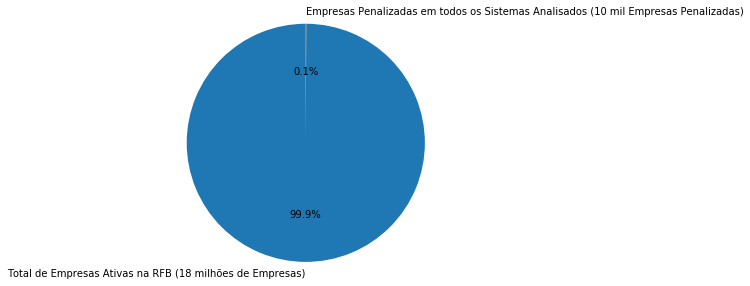

In [37]:
labels = ['Total de Empresas Ativas na RFB (18 milhões de Empresas)', 
          'Empresas Penalizadas em todos os Sistemas Analisados (10 mil Empresas Penalizadas)']
sizes = [18230893,10042]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 2. Quantidade de empresas no SICAF x Empresas penalizadas no SICAF

In [38]:
# Percentual de empresas penalisadas no SICAF de acordo com a qtd de empresas ativas na RFB: 
(len(pen.loc[pen['origem'] == 'SICAF'])) / len(cnpj.loc[cnpj['situacao_cadastral'] == 2])

0.0001958237246582473

In [39]:
# Percentual de empresas penalisadas no SICAF de acordo com a qtd de empresas no SICAF: 
# Quantidade de empresas (pessoa jurídica) no SICAF: 268.302
total_empresas_sicaf = 268302
(len(pen.loc[pen['origem'] == 'SICAF'])) / total_empresas_sicaf

0.013313355845278827

In [40]:
# Total de empresas no SICAF - empresas penalizadas no SICAF
268302 - 3572

264730

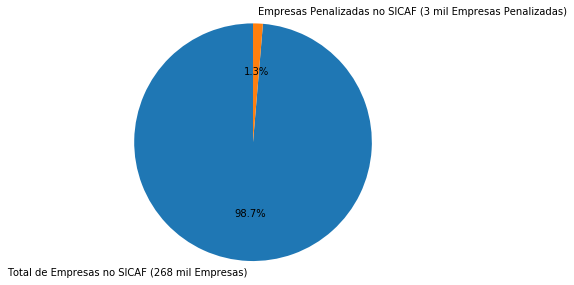

In [41]:
labels = ['Total de Empresas no SICAF (268 mil Empresas)', 'Empresas Penalizadas no SICAF (3 mil Empresas Penalizadas)']
sizes = [264730,3572]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 3. Penalidades por Porte da Empresa
* 01 - MICRO EMPRESA
* 05 - DEMAIS
* 03 - EMPRESA DE PEQUENO PORTE
* 00 - NAO INFORMADO

In [42]:
cnpj.porte_empresa.value_counts()

1.0    25011688
5.0    13960818
3.0     1160731
0.0       50921
Name: porte_empresa, dtype: int64

In [43]:
pen.porte_empresa.value_counts();

In [44]:
# Penalidades por Porte
pd.concat([pen.porte_empresa.value_counts(), 
                pen.porte_empresa.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'));

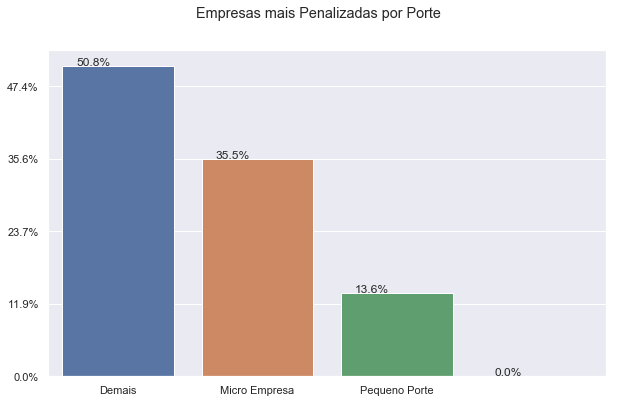

In [45]:
descending_order = pen.porte_empresa.value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10, 6));
sns.set(style="darkgrid")
suptitle("Empresas mais Penalizadas por Porte")
ax = sns.countplot(x="porte_empresa", data=pen, order=descending_order)
ax.set_xticklabels(["Demais","Micro Empresa","Pequeno Porte"])
ax.set_xlabel("") # Titulo do Eixo X
ax.set_ylabel("") # Titulo do Eixo Y

total = len(pen)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

## 4. Ranking de registros de penalidades por Origem (Sistema de Penalidades)

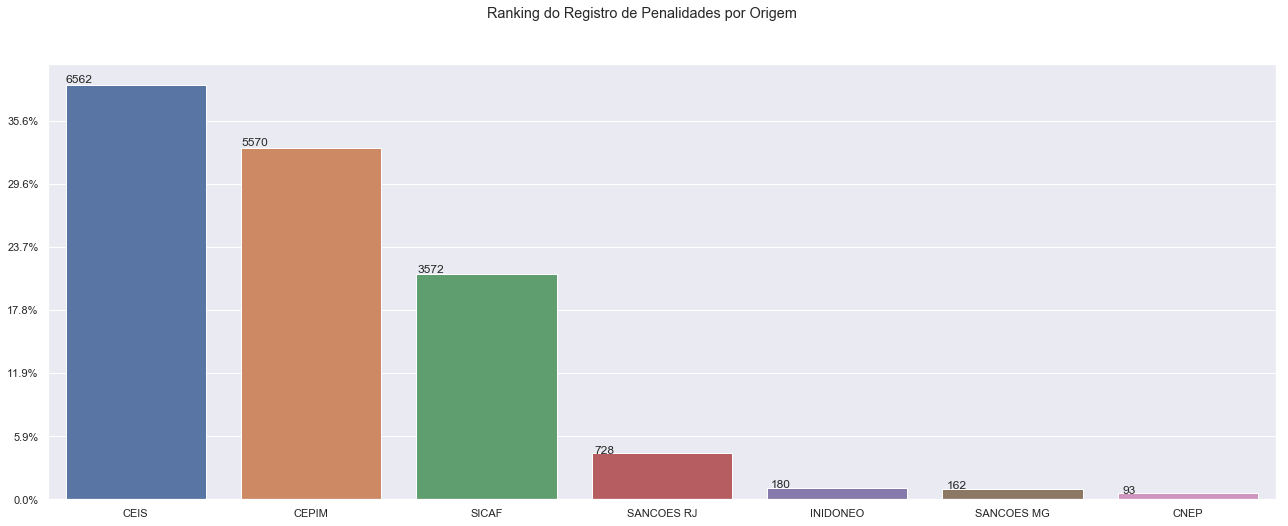

In [46]:
# 1. Penalidades por Origem
descending_order = pen.origem.value_counts().sort_values(ascending=False).index

plt.figure(figsize=(22, 8));
#sns.set(style="darkgrid")
suptitle("Ranking do Registro de Penalidades por Origem")
ax = sns.countplot(x="origem", data=pen, order=descending_order)
#ax.set_xticklabels(["Demais","Micro Empresa","Pequeno Porte"])
ax.set_xlabel("") # Titulo do Eixo X
ax.set_ylabel("") # Titulo do Eixo Y

total = len(pen)*1.
#for p in ax.patches:
#    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), ha="right")
        
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

## 5. Quem faz o registro de penalidades no SICAF, também faz no CEIS ou CEPIM?
Os registros de penalidades são feitos em mais de um sistema? 
* CEIS - Cadastro de Empresas Inidoneas e Suspensas
* CEPIM - Cadastr de Entidades Privadas Sem Fins Lucrativos Impedidas

In [47]:
# Filtra penalidades de empresas que tiveram mais de uma origem (sistema de cadastro de penalidades)
pen.groupby('cnpj')['origem'].nunique().sort_values(ascending=False).head()

cnpj
30834196000180    4
531541000146      3
62277207000165    3
8599961000176     3
5667996000107     3
Name: origem, dtype: int64

In [48]:
# Registro nos 3 sistemas. Empresa. SICAF - CEIS - INIDONEO
pen.loc[pen['cnpj'] == 5667996000107]

,cnpj,nome,penalidade,sancionador,motivo,dataInicio,dataFim,origem,razao_social,situacao_cadastral,codigo_natureza_juridica,data_inicio_atividade,uf,porte_empresa,dsc_cnae
2740,5667996000107,RG COMERCIAL E CONSTRUTORA E TERRAPLANAGEM LTD...,inexecução parcial da Nota de Empenho 2017NE04315,TRIBUNAL DE CONTAS DA UNIAO,"Declarada inidônea, com fundamento no art. 46 ...",04/09/2015,2020-09-03,SICAF,RG COMERCIAL E CONSTRUTORA E TERRAPLANAGEM LTDA,2.0,2062.0,2003-05-28,TO,3.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...
2768,5667996000107,RG COM E CONSTR. E TERRAPLANAGEM LTDA. ME,Inidoneidade - Lei Orgânica TCU,TRIBUNAL DE CONTAS DA UNIÃO,"Art. 46, Lei 8443/1992",04/09/2015,04/09/2020,CEIS,RG COMERCIAL E CONSTRUTORA E TERRAPLANAGEM LTDA,2.0,2062.0,2003-05-28,TO,3.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...
2846,5667996000107,RG CONSTRUTORA/RG COMERCIAL E CONSTRUTORA E TE...,Inidoneo,TCU,,04/09/2015,04/09/2020,INIDONEO,RG COMERCIAL E CONSTRUTORA E TERRAPLANAGEM LTDA,2.0,2062.0,2003-05-28,TO,3.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...


In [49]:
# Registro nos 3 sistemas. ASSOCIACAO. SICAF - CEPIM - INIDONEO
pen.loc[pen['cnpj'] == 37114485000154 ]

,cnpj,nome,penalidade,sancionador,motivo,dataInicio,dataFim,origem,razao_social,situacao_cadastral,codigo_natureza_juridica,data_inicio_atividade,uf,porte_empresa,dsc_cnae
9071,37114485000154,ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICOLA SUP...,inexecução parcial da Nota de Empenho 2017NE04315,TRIBUNAL DE CONTAS DA UNIAO,"Declarar, com fundamento no art. 46 da Lei 8.4...",06/02/2018,2023-02-05,SICAF,ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICOLA SUP...,4.0,3999.0,1992-03-05,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11901,37114485000154,ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICOLA SUP...,Impedimento,"Ministério da Agricultura, Pecuária e Abasteci...",IRREGULARIDADE NA EXECUCAO FIS. E FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICOLA SUP...,4.0,3999.0,1992-03-05,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
12700,37114485000154,ABEAS/ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICO...,Inidoneo,TCU,,06/02/2018,06/02/2023,INIDONEO,ASSOCIACAO BRASILEIRA DE EDUCACAO AGRICOLA SUP...,4.0,3999.0,1992-03-05,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...


In [50]:
# Registro tanto no CEIS quanto no CEPIM. Não há no SICAF.
pen.loc[pen['cnpj'] == 5086765000100]

,cnpj,nome,penalidade,sancionador,motivo,dataInicio,dataFim,origem,razao_social,situacao_cadastral,codigo_natureza_juridica,data_inicio_atividade,uf,porte_empresa,dsc_cnae
11592,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11593,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11594,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,IRREGULARIDADE NA EXECUCAO FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11595,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11596,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,IRREGULARIDADE NA EXECUCAO FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11597,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,IRREGULARIDADE NA EXECUCAO FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11598,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,MOTIVO NÃO ESPECIFICADO,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11599,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,IRREGULARIDADE NA EXECUCAO FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11600,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,IRREGULARIDADE NA EXECUCAO FINANCEIRA,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...
11601,5086765000100,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,Impedimento,Ministério do Turismo - Unidades com vínculo d...,MOTIVO NÃO ESPECIFICADO,,,CEPIM,ASSOCIACAO BRASILEIRA DAS EMPRESAS DE TRANSPOR...,4.0,3999.0,2002-05-24,DF,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...


## 6. Quais são os órgãos que mais aplicam penalidades;

In [51]:
# Quais órgãos que mais penalizam?
pen.groupby('sancionador').size().sort_values(ascending=False)

# Transforma para letra minuscula
pen['sancionador'] = pen['sancionador'].str.lower()

# Padroniza os principais, removendo ç , ã é ú e (ba)
pen['sancionador'] = pen['sancionador'].str.replace('ã', 'a')
pen['sancionador'] = pen['sancionador'].str.replace('ç', 'c')
pen['sancionador'] = pen['sancionador'].str.replace('é', 'e')
pen['sancionador'] = pen['sancionador'].str.replace('í', 'i')
pen['sancionador'] = pen['sancionador'].str.replace('ú', 'u')
pen['sancionador'] = pen['sancionador'].str.replace('á', 'a')
pen['sancionador'] = pen['sancionador'].str.replace(' \(ba\)', '')
pen['sancionador'] = pen['sancionador'].str.replace('tcu', 'tribunal de contas da uniao')
pen['sancionador'] = pen['sancionador'].str.replace('- unidades com vinculo direto', '')

# De novo...
pen.sancionador.value_counts().head(20)

ministerio da agricultura, pecuaria e abastecimento               1000
ministerio do turismo                                              916
ministerio da cidadania                                            806
governo do estado da bahia                                         667
justica eleitoral                                                  647
empresa brasileira de correios e telegrafos                        539
ministerio do planejamento,desenv. e gestao                        522
tribunal de contas da uniao                                        458
ministerio da saude                                                447
ministerio da economia                                             373
ministerio da mulher, familia e direitos humanos                   329
ministerio da educacao                                             300
empresa bras.de infra-estrutura aeroportuaria                      271
ministerio da ciência, tecnologia, inovacões e comunicacões        267
minist

## 7. As legislações mais aplicadas em penalidades

In [52]:
# 5. Top legislação aplicada
pen.motivo.value_counts().head(20);

In [53]:
# Quantidade motivos diferentes
pen.motivo.nunique()

3203

In [54]:
# Cria uma coluna de motivo padronizada removendo os pontos .
pen['motivo'] = pen['motivo'].str.replace('.','')

# Transforma para minuscula
pen['motivo'] = pen['motivo'].str.lower()

# Transforma para minuscula
pen['motivop'] = 'Legislação não informada'

# Lei 10520/2002 ou 10520/02 
pen.loc[pen['motivo'].str.contains('10520/2002'), 'motivop'] = 'Lei 10520/2002'
pen.loc[pen['motivo'].str.contains('10520/02'), 'motivop'] = 'Lei 10520/2002'
pen.loc[pen['motivo'].str.contains('8666/1993'), 'motivop'] = 'Lei 8666/1993'
pen.loc[pen['motivo'].str.contains('8666/93'), 'motivop'] = 'Lei 8666/1993'
pen.loc[pen['motivo'].str.contains('8429/1992'), 'motivop'] = 'Lei 8429/1992'
pen.loc[pen['motivo'].str.contains('8429/92'), 'motivop'] = 'Lei 8429/1992'
pen.loc[pen['motivo'].str.contains('9433/2005'), 'motivop'] = 'Lei 9433/2005'
pen.loc[pen['motivo'].str.contains('9433/05'), 'motivop'] = 'Lei 9433/2005'
pen.loc[pen['motivo'].str.contains('10233/2001'), 'motivop'] = 'Lei 10233/2001'
pen.loc[pen['motivo'].str.contains('10233/01'), 'motivop'] = 'Lei 10233/2001'
pen.loc[pen['motivo'].str.contains('9504/1997'), 'motivop'] = 'Lei 9504/1997'
pen.loc[pen['motivo'].str.contains('9504/97'), 'motivop'] = 'Lei 9504/1997'
pen.loc[pen['motivo'].str.contains('8443/1992'), 'motivop'] = 'Lei 8443/1992'
pen.loc[pen['motivo'].str.contains('8443/92'), 'motivop'] = 'Lei 8443/1992'
pen.loc[pen['motivo'].str.contains('13303/2016'), 'motivop'] = 'Lei 13303/2016'
pen.loc[pen['motivo'].str.contains('13303/16'), 'motivop'] = 'Lei 13303/2016'
pen.loc[pen['motivo'].str.contains('12846/2013'), 'motivop'] = 'Lei 12846/2013'
pen.loc[pen['motivo'].str.contains('12846/13'), 'motivop'] = 'Lei 12846/2013'
pen.loc[pen['motivo'].str.contains('45902/2012'), 'motivop'] = 'Decreto 45902/2012'
pen.loc[pen['motivo'].str.contains('45902/12'), 'motivop'] = 'Decreto 45902/2012'
pen.loc[pen['motivo'].str.contains('5450/2005'), 'motivop'] = 'Decreto 5450/2005'
pen.loc[pen['motivo'].str.contains('5450/05'), 'motivop'] = 'Decreto 5450/2005'
pen.loc[pen['motivo'].str.contains('5450/2005'), 'motivop'] = 'Decreto 5450/2005'
pen.loc[pen['motivo'].str.contains('5450/05'), 'motivop'] = 'Decreto 5450/2005'
pen.loc[pen['motivo'].str.contains('12529/2011'), 'motivop'] = 'Lei 12529/2011'
pen.loc[pen['motivo'].str.contains('12529/11'), 'motivop'] = 'Lei 12529/2011'
pen.loc[pen['motivo'].str.contains('2745/1998'), 'motivop'] = 'Decreto 2745/1998'
pen.loc[pen['motivo'].str.contains('2745/98'), 'motivop'] = 'Decreto 2745/1998'
pen.loc[pen['motivo'].str.contains('clausula'), 'motivop'] = 'Cláusula Contratual'
pen.loc[pen['motivo'].str.contains('cláusula'), 'motivop'] = 'Cláusula Contratual'
pen.loc[pen['motivo'].str.contains('estadual'), 'motivop'] = 'Legislação Estadual'
pen.loc[pen['motivo'].str.contains('acórdão'), 'motivop'] = 'Acórdão TCU'
pen.loc[pen['motivo'].str.contains('acordão'), 'motivop'] = 'Acórdão TCU'
pen.motivop.value_counts().head(20);

In [55]:
# Quantidade de motivos padronizados
pen.motivop.nunique();

In [79]:
# Penalidades por Legislação Aplicada
#sns.set(font_scale=2) 
#plt.figure(figsize=(14, 9));
#ax = sns.countplot(y="motivop", data=pen, order=descending_order)
#suptitle("Ranking do Registro de Penalidades por Legislação Aplicada")
#ax.set_xlabel("") # Titulo do Eixo X
#ax.set_ylabel("") # Titulo do Eixo Y
pen.motivop.value_counts()

Legislação não informada    8089
Lei 8666/1993               3100
Lei 10520/2002              2104
Lei 8429/1992                743
Cláusula Contratual          651
Lei 9504/1997                630
Lei 9433/2005                501
Acórdão TCU                  282
Lei 10233/2001               204
Lei 8443/1992                184
Lei 12846/2013                99
Lei 13303/2016                85
Legislação Estadual           57
Decreto 45902/2012            48
Decreto 5450/2005             47
Lei 12529/2011                23
Decreto 2745/1998             20
Name: motivop, dtype: int64

## 8. Ranking das penalidades mais aplicadas (impedimento, multas, suspensão);

Manual de Sanções[1]: https://www.comprasgovernamentais.gov.br/images/conteudo/ArquivosCGNOR/manual-sancoes-22-09.pdf <br/>
Manual de Sanções[2]: https://www.comprasgovernamentais.gov.br/images/conteudo/ArquivosCGNOR/caderno-de-logistica-de-sancao-2.pdf<br/>
Painel de Transferencias Volunárias: https://www.transferenciasabertas.planejamento.gov.br/

In [57]:
# Penalidades por Tipo (multa, advertencia, suspensão, etc)
pen.penalidade.value_counts()

Impedimento                                                                                 5570
Impedimento - Lei do Pregão                                                                 1961
Suspensão - Lei de Licitações                                                               1409
inexecução parcial da Nota de Empenho 2017NE04315                                           1374
Multa - Lei 13.303/2016, art. 83, inc. II                                                    815
Inidoneidade - Lei de Licitações                                                             803
Proibição - Lei de Improbidade                                                               646
Inidoneidade - Legislação Estadual                                                           602
Advertência - Lei 13.303/2016, art. 83, inc. I                                               466
Suspensão temporária e Impedimento de contratar - Lei 13.303/2016, art. 83, inc. III         463
Conforme inciso X. art.6º do D

In [58]:
# Transforma para minuscula
pen['penalidade'] = pen['penalidade'].str.lower()

# Transforma para minuscula
pen['penalidadep'] = 'Outras'

# Cria categorias para Padronizar os textos das penalidades
pen.loc[pen['penalidade'].str.contains('proibição'), 'penalidadep'] = 'Proibição'
pen.loc[pen['penalidade'].str.contains('impedimento'), 'penalidadep'] = 'Impedimento'
pen.loc[pen['penalidade'].str.contains('suspensão'), 'penalidadep'] = 'Suspensão'
pen.loc[pen['penalidade'].str.contains('inidoneidade'), 'penalidadep'] = 'Inidoneidade'
pen.loc[pen['penalidade'].str.contains('advertência'), 'penalidadep'] = 'Advertência'
pen.loc[pen['penalidade'].str.contains('multa'), 'penalidadep'] = 'Multa'
pen.loc[pen['penalidade'].str.contains('decisão judicial'), 'penalidadep'] = 'Decisão Judicial'
pen.loc[pen['penalidade'].str.contains('inexecução'), 'penalidadep'] = 'Inexecução'
pen.penalidadep.nunique()

9

In [59]:
pen.penalidadep.value_counts()

Impedimento         7631
Suspensão           2240
Inidoneidade        1842
Inexecução          1374
Multa               1151
Outras              1120
Proibição            860
Advertência          466
Decisão Judicial     183
Name: penalidadep, dtype: int64

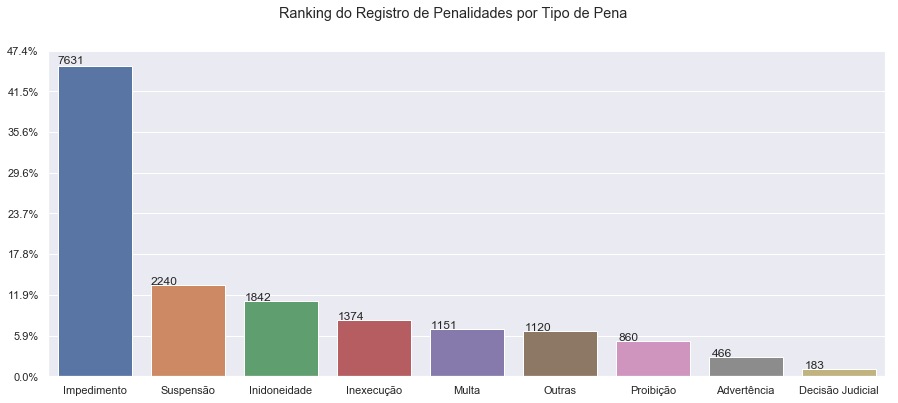

In [60]:
# 1. Penalidades por Pena
descending_order = pen.penalidadep.value_counts().sort_values(ascending=False).index

#penalidades['ano'].value_counts()[:15].plot(kind='barh')

plt.figure(figsize=(15, 6));
sns.set(font_scale=2) 
sns.set(style="darkgrid")
suptitle("Ranking do Registro de Penalidades por Tipo de Pena")
ax = sns.countplot(x="penalidadep", data=pen, order=descending_order)
#ax.set_xticklabels(["Demais","Micro Empresa","Pequeno Porte"])
ax.set_xlabel("") # Titulo do Eixo X
ax.set_ylabel("") # Titulo do Eixo Y

total = len(pen)*1.
#for p in ax.patches:
#    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), ha="right")
        
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

## 9. Penalidades por mês e ano: Quando acontecem mais penalidades? 

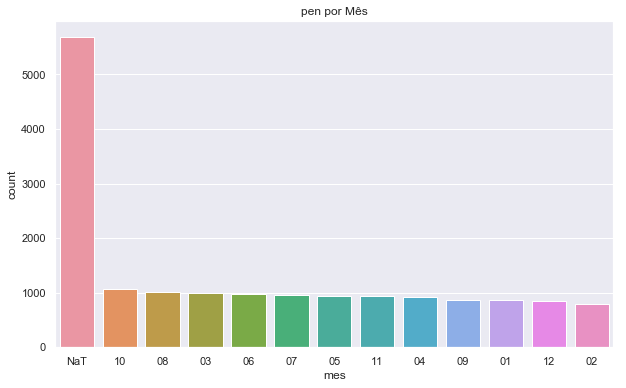

In [61]:
# Quando acontecem mais pen? 
import datetime
import pandas as pd
import math

# Formata para mes
pen['dataInicio']=pd.to_datetime(pen['dataInicio'], format="%d/%m/%Y", errors='coerce')
#pen['mes'] = pen['dataInicio'].dt.month
pen['mes'] = pen['dataInicio'].dt.strftime('%m')

# Qtd por Mês
descending_order = pen.mes.value_counts().sort_values(ascending=False).index

# Grafico de pen por Mês
plt.figure(figsize=(10, 6));
sns.countplot(x='mes', data=pen, order=descending_order);
plt.title('pen por Mês');

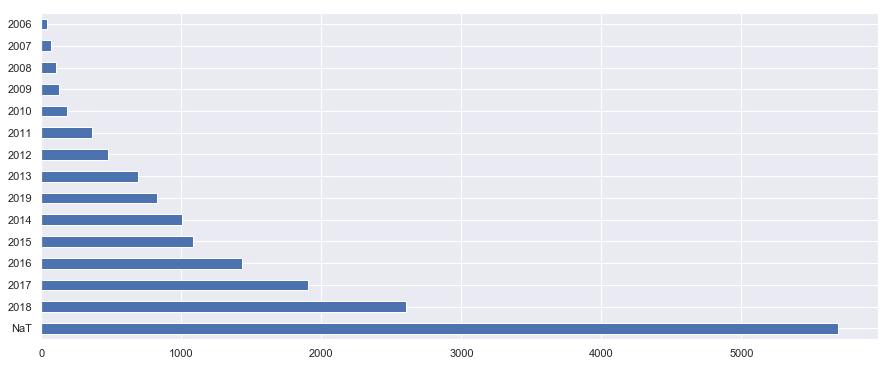

In [62]:
# Formata Penalidades por Ano
pen['ano'] = pen['dataInicio'].dt.strftime('%Y')
plt.figure(figsize=(15, 6));
# Qtd por Mês
pen.ano.value_counts().head(10)

# Grafico
pen['ano'].value_counts()[:15].plot(kind='barh')

## 10. Penalidades por natureza jurídica;
Começa com:
* 1 - Administração Pública
* 2 - Entidades Empresariais (2135: Empresario individual, 2062 - Sociedade Empresária Limitada, 2305: Empresa Individual, 2135: Empresário)
* 3 - Entidades sem Fins Lucrativos (3999: Associação Privativa, 3069: Fundacao Privada, 3131:Entidade Sindical)
* 4 - Pessoa Física (4090: Candidato a Cargo Político, 4120: Produtor Rural)
* 5 - Organizações Internacionais

Fonte: [Tabela de Natureza Jurídica](https://cnae.ibge.gov.br/images/concla/documentacao/CONCLA-TNJ2018-EstruturaDetalhada.pdf)

In [63]:
pen.codigo_natureza_juridica.value_counts()

2062.0    6776
3999.0    4875
2305.0    2083
2135.0    1539
3069.0     528
2143.0     269
3131.0     197
2054.0     189
2240.0     171
2151.0      73
2232.0      37
2038.0      20
3077.0      18
2313.0      15
1074.0      13
2046.0      11
2011.0       9
2216.0       7
1104.0       6
2178.0       5
3220.0       4
1244.0       4
4014.0       3
1082.0       3
1023.0       2
1112.0       2
1015.0       2
1201.0       1
2070.0       1
2321.0       1
3085.0       1
4120.0       1
1058.0       1
Name: codigo_natureza_juridica, dtype: int64

In [64]:
pen.loc[pen['codigo_natureza_juridica'] == 1104];

In [65]:
# Cria uma coluna apenas com o primeiro digito da natureza jurídica
pen['natureza'] = pen['codigo_natureza_juridica'].astype(str).str[0]
pen.natureza.value_counts();

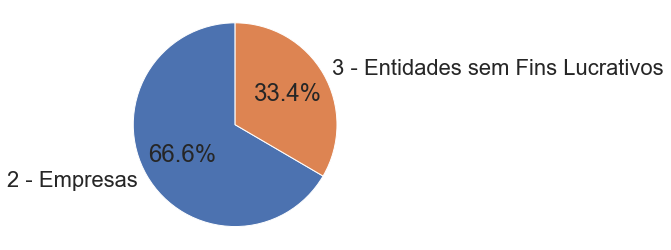

In [66]:
labels = ['2 - Empresas', '3 - Entidades sem Fins Lucrativos']
sizes = [11206,5623]
sns.set(font_scale=2)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 11. Quais tipos de serviços (CNAE) que sofreram mais penalidades?

In [67]:
pen.dsc_cnae.value_counts().head(20)

ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITOS SOCIAIS                                                                3688
CONSTRUÇÃO DE EDIFÍCIOS                                                                                                 947
COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENTOS E SUPRIMENTOS DE INFORMÁTICA                                           563
LIMPEZA EM PRÉDIOS E EM DOMICÍLIOS                                                                                      296
SERVIÇOS DE ENGENHARIA                                                                                                  262
ATIVIDADES DE ORGANIZAÇÕES SINDICAIS                                                                                    200
COMÉRCIO VAREJISTA DE ARTIGOS DE PAPELARIA                                                                              175
TRANSPORTE RODOVIÁRIO DE CARGA, EXCETO PRODUTOS PERIGOSOS E MUDANÇAS, INTERMUNICIPAL, INTERESTADUAL E INTERNACIONAL     171
COMÉRCIO

## 12. Top Empresas mais Penalizadas

In [68]:
# 6. Top empresas penalisadas
pen.nome.value_counts().head(20)

CNHS INFORMATICA LTDA - ME                                99
R.F. CASALI TRANSPORTES - ME                              94
ASSOCIACAO SERGIPANA DE BLOCOS DE TRIO                    68
V & M INFORMATICA LTDA - ME                               63
ASSOCIACAO DE ENSINO SUPERIOR DE NOVA IGUACU              55
ASSOCIACAO NACIONAL DE COOPERACAO AGRICOLA                41
PREMIUM AVANCA BRASIL                                     39
FUNDACAO RIO MADEIRA                                      37
FUNDACAO JOSE AMERICO                                     37
ORGANIZACAO DE SAUDE COM EXCELENCIA E CIDADANIA - OSEC    35
MUITO ESPECIAL                                            33
FUNDACAO DE GESTAO E INOVACAO                             33
FUNDACAO DE APOIO A PESQUISA E A EXTENSAO                 25
MEGA PRESTADORA DE SERVICOS LTDA - EPP                    24
GENIUS INSTITUTO DE TECNOLOGIA                            23
IEC INSTITUTO EDUCAR E CRESCER                            22
SOBEU - ASSOCIACAO BARRA

In [69]:
# Filtra as penalidades de uma empresa
pen[pen['nome'].str.contains('GENIUS INSTITUTO DE TECNOLOGIA')];

## 13. Empresas mais penalizadas por UF. 

In [70]:
# Quantidade do total de empresas por UF
cnpj.uf.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

SP    28.7%
MG    11.0%
RJ     8.5%
RS     7.5%
PR     6.7%
BA     5.2%
SC     4.4%
GO     3.4%
PE     3.1%
CE     2.9%
ES     2.0%
PA     2.0%
MT     1.8%
DF     1.7%
MA     1.6%
MS     1.4%
PB     1.3%
RN     1.2%
AM     1.0%
AL     1.0%
PI     0.9%
RO     0.7%
TO     0.7%
SE     0.7%
EX     0.3%
AC     0.2%
AP     0.2%
RR     0.2%
BR     0.0%
Name: uf, dtype: object

In [71]:
# Quantidade de penalidades por UF
pen.uf.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

SP    17.2%
RJ    11.3%
BA     8.2%
MG     7.9%
PR     7.4%
DF     7.0%
RS     5.3%
GO     4.3%
PE     3.6%
SC     3.0%
CE     2.6%
MA     2.4%
ES     2.1%
PB     2.0%
PA     1.9%
SE     1.9%
RN     1.7%
AM     1.6%
RO     1.5%
MT     1.4%
PI     1.2%
AL     1.1%
TO     1.1%
MS     1.0%
AP     0.6%
AC     0.4%
RR     0.4%
EX     0.0%
Name: uf, dtype: object

## 14. Foram dados prazos diferentes para a mesma penalidade?

In [72]:
# Contabiliza quantos dias de penalidades foram aplicados
pen['dataFim2'] = pd.to_datetime(pen['dataFim'], format="%Y-%m-%d", errors='coerce')
pen['dias_de_penalidade'] = pen.dataFim2 - pen.dataInicio
pen['dias_de_penalidade'] = pen['dias_de_penalidade'].astype('timedelta64[D]')
pen.dias_de_penalidade.describe()

count    2099.000000
mean     1262.939971
std       721.156692
min         0.000000
25%       729.000000
50%      1825.000000
75%      1825.000000
max      7304.000000
Name: dias_de_penalidade, dtype: float64

In [73]:
pen[pen.dias_de_penalidade > 7000]

,cnpj,nome,penalidade,sancionador,motivo,dataInicio,dataFim,origem,razao_social,situacao_cadastral,...,uf,porte_empresa,dsc_cnae,motivop,penalidadep,mes,ano,natureza,dataFim2,dias_de_penalidade
9041,2282215000178,INSTITUTO MANGUE VERDE,inexecução parcial da nota de empenho 2017ne04315,"ministerio do planejamento,desenv. e gestao",proibida de contratar com o poder público ou r...,2014-05-30,2034-05-29,SICAF,INSTITUTO MANGUE VERDE,8.0,...,AL,5.0,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...,Acórdão TCU,Inexecução,05,2014,3,2034-05-29,7304.0


In [74]:
pen['dias_de_penalidade'] = pen['dias_de_penalidade'].fillna(0)
a = pen.groupby('penalidadep')['dias_de_penalidade'].agg([pd.np.min, pd.np.mean, pd.np.max])
a = a.astype(int)
a

,amin,mean,amax
penalidadep,,,
Advertência,0,0,0
Decisão Judicial,0,0,0
Impedimento,0,0,0
Inexecução,0,1525,7304
Inidoneidade,0,0,0
Multa,0,0,0
Outras,0,287,3652
Proibição,0,0,0
Suspensão,0,104,1826


## Conclusão
* Poucas empresas são penalizadas.
* A falta de integração dos sistemas de registro de penalidades complicam tanto o registro quanto o uso da informação.
* Precisamos garantir que os penalizados sejam impedidos na origem de serem contratados ou receberem recursos via repasse, convênios.

##  Próximos Passos
1. Integrar os dados de penalidades dos sistemas de compras do Brasil no âmbito Nacional via RNCP
2. Usar um sistema único para registro de penalidades 
3. Travar no Sistema a contratação ou participação de Empresas Impedidas
4. Criar modelo de aprendizado de máquina para prever se uma empresa será penalizada de novo para gerar alertas de riscos futuros